# MEDPC Data Tutorial

**Contact:**
* Dexter Kim: @dexterkim2000@gmail.com
* Brett Hathaway: 

**Note: This tutorial is split into multiple sections for...**

**Before you start, please complete the following:**
* Make sure you have this notebook, rgt_functions.py file, and your raw data (to be analyzed) in your current working directory 
* Please run the following cell!**Summarize your data by experimental/control set**
* if you only want to view certain columns, specify them in mean_scores 
    * For example, `mean_scores[['risk29', 'risk30']]` will create a table with only those 2 columns
    * Each value is the mean for that column (ex. `29P1`) within the set (`tg negative` or `tg positive`) 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#MEDPC rat gambling task functions imports, will print "I am being executed!" if functional
import rgt_functions as rgt

#main imports 
import os
import pandas as pd
import numpy as np

# plotting imports 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# stats imports 
import scipy.stats as stats

#the following line prevents pandas from giving unecessary errors 
pd.options.mode.chained_assignment = None

I am being executed!


# Setting Variables (objects) 

Set your variables! These will be used later in the code. Example arguments are left in for clarity.

###Brett will edit

In [3]:
#we need to set a few variables for loading in the data - these will change depending on the dataset

#in file_names (List[str]), add the file names you wish to read into Python 
file_names = ['BH07_raw_free_S29-30.xlsx']

#in group_names (List[str]), add the names of the control and experimental group, respectively 
group_names = ['Tg negative','Tg positive'] 

title = 'Nigrostriatal activation during acquisition' #title for figures, describing the experiment
startsess = 29 #first session in this dataset
endsess = 30 #last session in this dataset

group_names = {0: 'tg negative',
              1: 'tg positive'} ##group_names is used twice (as a list, and as a dict)

#the following two lines of code assign the rat subject numbers to the experimental and control group lists
exp_group = [1, 2, 7, 8, 11, 12, 16, 19, 20, 21, 22, 25, 26, 29, 32] #Tg positive

control_group = [3, 4, 5, 6, 9, 13, 14, 15, 17, 18, 23, 24, 27, 28, 30, 31] #Tg negative

# Load data into Python
* `load_data()` takes in one argument: file_names 
* `load_data()` outputs a table similar to the excel sheet(s) you loaded in. (in the order established in `file_names`) 
* note: `df` means dataframe, and is an object that will store your dataframe (table containing your data) 
* passing `reset_sessions = True` ##makes the sessions start from 1 again (you may want to do this for baseline acquisition analysis)
* `load_multiple_data()` loads in multiple cohorts (with the same subject numbers) and assigns them unique subject numbers (ex. subject 1 of cohort 1 --> subject 101) 

In [4]:
df = rgt.load_data(file_names)

#load_data won't output a dataframe itself. Use the following function to view the top of your dataframe. Note: it should look the exact same as your first excel file. 

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


# Acquisition Analysis Section (Analysis by Session)

**Check your session data**
* `check_sessions` gives us a summary for each rat (subject) including session numbers, session dates and # trials for each session.
* This allows us to see if there are any missing/incorrect session numbers, and if MED-PC exported all of the desired data into the Excel file you loaded in (`file_names`). 
* `edit_sess()` can change session numbers (not included in the tutorial) 

In [5]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-09  28          53.0
         2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  

**To drop/remove data from certain session(s)**
* replace `session_num` with the session number data you want to remove
* for example, to remove all data from session 28 and 29, I would write: `rgt.drop_sessions(df, [28, 29])`
* **make sure to remove the correct session(s)**, if you remove the wrong session and want to put the data back, you'll have to restart the Kernel and restart from `load_data`

##drop_subjects and drop_groups could be added here

In [6]:
# rgt.drop_sessions(df, session_num) #session_num is a list of integers
rgt.drop_sessions(df, [28])

**Check that you dropped the session desired (in this example, we dropped data from session 28)**

In [7]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  29          80.1
         2020-10-10  

In [8]:
# rgt.edit_sess(df, [30, 31], [29, 30])

# range(len(df))
# df
# i = 2 
# df.at[i, 'Session']

**Run the following cell to acquire a summary of your data.**

The rows represent subjects (rats 1 to n)

The columns are explained below:
* `##P#` represents the percent choice of each option. For example, `29P1` represents the percentage of times P1 was selected during the 29th session. 
* `risk##` represents the risk score for each session: (P1 + P2) - (P3 + P4) 
* `collect_lat##` represents the mean collect latency for each session
* `choice_lat##` represents the mean choice latency for each session 
* `trial##` represents the number of trials (not including premature responses or omissions) for each session
* `prem##` represents the number of premature responses for each session

In [9]:
df_sum = rgt.get_summary_data(df)
df_sum #prints the dataset 

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,0.929160,1.058226,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.157333,1.010617,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,0.467174,0.549070,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,0.904412,0.817938,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.397385,0.618125,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470
6,2.5,70,0,27.5,2.94118,63.2353,0,33.8235,45,32.3529,0.739000,0.686618,2.172000,1.859265,8,7,88.0,75.0,9.278351,15.730337
7,3.07692,10.7692,64.6154,21.5385,1.81818,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.439077,0.473273,1.012615,1.194545,0,0,65.0,56.1,16.666667,34.523810
8,2.41935,92.7419,0.806452,4.03226,2.47934,94.2149,1.65289,1.65289,90.3226,93.3884,1.401532,1.353884,1.850484,1.956033,0,0,124.0,121.0,10.144928,12.949640
9,3.27869,3.27869,90.1639,3.27869,5.26316,7.01754,82.4561,5.26316,-86.8852,-75.4386,0.367869,0.349474,2.300328,2.754211,1,4,62.0,61.0,20.512821,11.594203
11,10.687,88.5496,0.763359,0,8.14815,91.1111,0,0.740741,98.4733,98.5185,1.116794,1.246519,1.950153,1.667852,1,0,132.0,136.1,2.222222,7.534247


**Get the risk status of the rats using the following code**
* Note: 
    * `risk_status == 1` indicates a positive risk score (optimal) 
    * `risk_status == 2` indicates a negative risk score (risky)
    * `mean_risk` is the mean risk score averaged across the sessions between `startsess` and `endsess` for a given subject
        * you can change `startsess` and `endsess` by passing the session numbers instead. For example, `rgt.get_risk_status(df_sum, 28, 30)`
    * `print(risky, optimal)` prints out 2 list of rat subjects: the risky rats, and the optimal rats 

In [10]:
df_summary, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_summary[['mean_risk','risk_status']]) ##printed 2 of many columns in df_summary
print(risky, optimal) #prints 2 lists: the subject numbers of the risky rats, and the subject numbers of the optimal rats

    mean_risk  risk_status
1   73.904211          1.0
2   56.148148          1.0
3  -77.502528          2.0
4   57.762280          1.0
5  -81.274038          2.0
6   38.676471          1.0
7  -73.426573          2.0
8   91.855505          1.0
9  -81.161921          2.0
11  98.495900          1.0
12  32.942097          1.0
13 -33.705357          2.0
14  43.214286          1.0
15 -41.344124          2.0
16 -30.296896          2.0
17   0.633446          1.0
18  41.629689          1.0
19   4.054054          1.0
20  91.116505          1.0
21  11.868687          1.0
22  62.978469          1.0
23  75.345912          1.0
24  71.178218          1.0
25 -98.437500          2.0
26  35.270270          1.0
27  44.732745          1.0
28  43.102453          1.0
29 -30.433996          2.0
30  94.573643          1.0
31  80.796731          1.0
32   1.587302          1.0
[3, 5, 7, 9, 13, 15, 16, 25, 29] [1, 2, 4, 6, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32]


**Export your data to an Excel file!** 
* Note: `'tg_status'` is the column name that specifies the control vs. experimental group
* Note2: `'BH07_free_S29-30.xlsx'` specifies the name of the Excel file

In [11]:
rgt.export_to_excel(df_summary, [control_group, exp_group], column_name = 'tg_status', file_name = 'BH07_free_S29-30.xlsx')

##Brett will edit control_group

**Summarize your data by experimental/control set**
* if you only want to view certain columns, specify them in mean_scores 
    * For example, `mean_scores[['risk29', 'risk30']]` will create a table with only those 2 columns
    * Each value is the mean for that column (ex. `29P1`) within the set (`tg negative` or `tg positive`) 

In [22]:
mean_scores, stderror = rgt.get_group_means_sem(df_summary, [control_group, exp_group], group_names)
mean_scores #all mean scores
# mean_scores[['risk29', 'risk30']] #specify columns

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
tg negative,5.74901,50.9906,33.8409,9.41941,7.24256,53.3089,28.8852,10.5634,13.4793,21.1029,...,2.10245,2.07925,3.25,3.5,77.4563,83.0812,14.055,13.637,17.2911,1.3125
tg positive,16.0466,45.0598,21.712,17.1815,14.8991,45.8362,22.0626,17.2021,22.2129,21.4706,...,1.77515,1.82612,1.53333,2.73333,86.56,85.0267,18.3601,20.5969,21.8417,1.26667


# Plotting Section (by Sessions) 

**Graph of the table above**
* `variable` specifies the variable you want to plot. 
* For example, if I want to plot `choice_lat` over sessions for the experimental and control group, I would replace `variable` with `'choice_lat'`

##this could be improved in description - 
##why does typing 'risk' work?

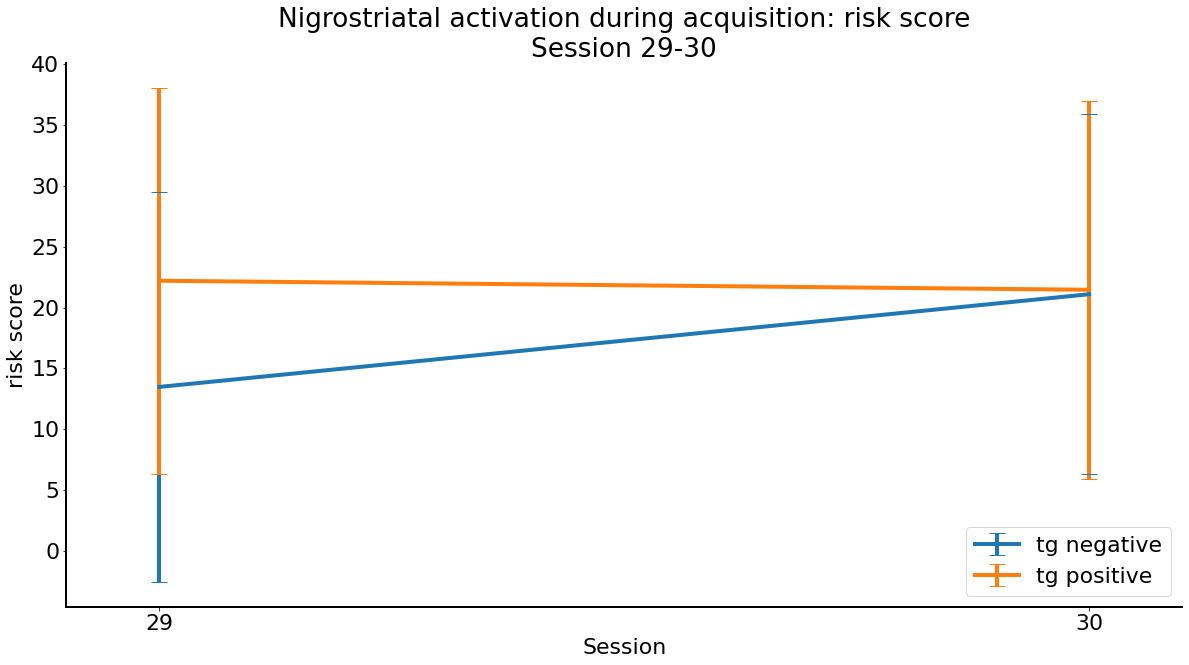

In [26]:
rgt.rgt_plot('risk',startsess,endsess,['tg negative','tg positive'],title,mean_scores,stderror, var_title='risk score')

**Bar plot of the df above**

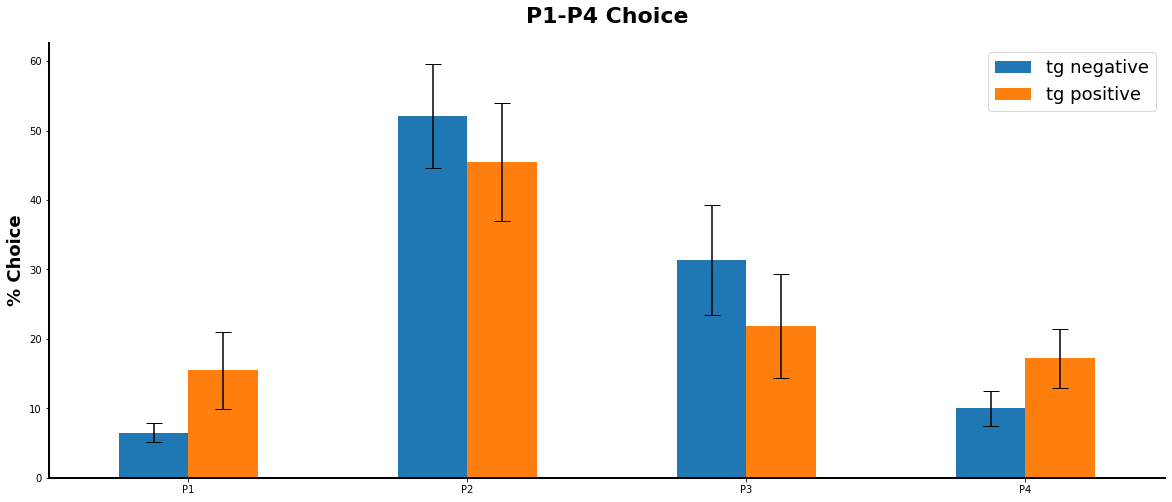

In [24]:
rgt.choice_bar_plot(startsess,endsess,mean_scores,stderror)

# Latin Square Analysis (Analysis by Group) 

* Please note! This is the same workflow as the acquisition analysis 

**Check your group data**

In [12]:
rgt.check_groups(df)

Subject  Group
1        0.0      131.1
2        0.0       81.0
3        0.0       49.0
4        0.0      103.0
5        0.0       69.0
6        0.0       88.0
7        0.0       65.0
8        0.0      124.0
9        0.0       62.0
11       0.0      136.1
12       0.0       72.0
13       0.0       67.0
14       0.0       91.0
15       0.0       60.1
16       0.0       59.1
17       0.0       73.0
18       0.0       76.0
19       0.0       76.0
20       0.0      109.0
21       0.0       74.0
22       0.0      115.0
23       0.0      107.1
24       0.0      117.0
25       0.0       66.0
26       0.0       75.1
27       0.0       95.0
28       0.0       91.1
Name: Trial, dtype: float64


**To edit/relabel group numbers**

In [13]:
rgt.edit_group(df, [0], [1])

,index,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,...,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5,option
0,0,rGT_A-cue,2020-10-09,11:01:00,25,1.0,1,0.0,NaN,29,...,3,30,0,0,0,0,0,0,0,3
1,1,rGT_A-cue,2020-10-09,11:01:00,25,1.0,1,0.0,NaN,29,...,0,0,1,5,0,0,0,0,0,0
2,2,rGT_A-cue,2020-10-09,11:01:00,25,1.0,1,0.0,NaN,29,...,2,30,0,0,0,0,0,0,0,3
3,3,rGT_A-cue,2020-10-09,11:01:00,25,1.0,1,0.0,NaN,29,...,0,0,0,0,0,0,0,0,0,3
4,4,rGT_A-cue,2020-10-09,11:01:00,25,1.0,1,0.0,NaN,29,...,2,30,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,6515,rGT_B-cue,2020-10-10,11:29:57,32,NaN,5,NaN,NaN,30,...,0,0,0,0,0,0,0,0,0,0
6202,6516,rGT_B-cue,2020-10-10,11:29:57,32,NaN,5,NaN,NaN,30,...,0,0,0,0,0,0,0,0,0,0
6203,6517,rGT_B-cue,2020-10-10,11:29:57,32,NaN,5,NaN,NaN,30,...,0,10,0,0,0,0,0,0,0,2
6204,6518,rGT_B-cue,2020-10-10,11:29:57,32,NaN,5,NaN,NaN,30,...,0,40,0,0,0,0,0,0,0,4


**Check that you edited the group desired**

In [14]:
rgt.check_groups(df)

Subject  Group
1        1.0      131.1
2        1.0       81.0
3        1.0       49.0
4        1.0      103.0
5        1.0       69.0
6        1.0       88.0
7        1.0       65.0
8        1.0      124.0
9        1.0       62.0
11       1.0      136.1
12       1.0       72.0
13       1.0       67.0
14       1.0       91.0
15       1.0       60.1
16       1.0       59.1
17       1.0       73.0
18       1.0       76.0
19       1.0       76.0
20       1.0      109.0
21       1.0       74.0
22       1.0      115.0
23       1.0      107.1
24       1.0      117.0
25       1.0       66.0
26       1.0       75.1
27       1.0       95.0
28       1.0       91.1
Name: Trial, dtype: float64


**Run the following cell to acquire a summary of your data.**

The rows represent subjects (rats 1 to n)

The columns are explained below:
* ##P# represents the percent choice of each option. For example, 29P1 represents the percentage of times P1 was selected during the ##th group. 
* risk## represents the risk score for each group: (P1 + P2) - (P3 + P4) 
* collect_lat## represents the mean collect latency for each group
* choice_lat## represents the mean choice latency for each group
* trial## represents the number of trials (not including premature responses or omissions) for each group
* prem## represents the number of premature responses for each group

In [15]:
rgt.get_summary_data(df, mode = 'Group')

,1.0P1,1.0P2,1.0P3,1.0P4,nanP1,nanP2,nanP3,nanP4,risk1.0,risknan,collect_lat1.0,collect_latnan,choice_lat1.0,choice_latnan,omit1.0,omitnan,trial1.0,trialnan,prem1.0,premnan
1,87.0588,0,12.549,0.392157,NaN,NaN,NaN,NaN,74.1176,NaN,0.991922,NaN,0.646588,NaN,0,NaN,131.1,NaN,25.655977,NaN
2,7.05128,71.1538,5.12821,16.6667,NaN,NaN,NaN,NaN,56.4103,NaN,1.081154,NaN,1.157051,NaN,1,NaN,81.0,NaN,32.034632,NaN
3,1.1236,10.1124,61.7978,26.9663,NaN,NaN,NaN,NaN,-77.5281,NaN,0.506742,NaN,3.229213,NaN,5,NaN,49.0,NaN,5.050505,NaN
4,9.54774,69.3467,4.0201,17.0854,NaN,NaN,NaN,NaN,57.7889,NaN,0.862261,NaN,0.944573,NaN,1,NaN,103.0,NaN,19.028340,NaN
5,4.65116,4.65116,89.1473,1.55039,NaN,NaN,NaN,NaN,-81.3953,NaN,0.506899,NaN,3.155891,NaN,8,NaN,69.0,NaN,12.738854,NaN
6,2.7027,66.8919,0,30.4054,NaN,NaN,NaN,NaN,39.1892,NaN,0.714932,NaN,2.028311,NaN,15,NaN,88.0,NaN,12.365591,NaN
7,2.5,10.8333,66.6667,20,NaN,NaN,NaN,NaN,-73.3333,NaN,0.454750,NaN,1.096000,NaN,0,NaN,65.0,NaN,25.925926,NaN
8,2.44898,93.4694,1.22449,2.85714,NaN,NaN,NaN,NaN,91.8367,NaN,1.378000,NaN,1.902612,NaN,0,NaN,124.0,NaN,11.552347,NaN
9,4.23729,5.08475,86.4407,4.23729,NaN,NaN,NaN,NaN,-81.3559,NaN,0.358983,NaN,2.519576,NaN,5,NaN,62.0,NaN,16.326531,NaN
11,9.3985,89.8496,0.37594,0.37594,NaN,NaN,NaN,NaN,98.4962,NaN,1.182632,NaN,1.806880,NaN,1,NaN,136.1,NaN,4.982206,NaN


**Get risk status of the vehicle**

In [28]:
# rgt.get_risk_status_vehicle(df) ##Doesn't work

# Plotting Section (by Groups) 

**Graph of the table above**
* `variable` specifies the variable you want to plot. 
* For example, if I want to plot `choice_lat` over sessions for the experimental and control group, I would replace `variable` with `'choice_lat'`

##this could be improved in description

In [27]:
rgt.ls_bar_plot

rgt.rgt_bar_plot

<function rgt_functions.rgt_bar_plot(variable, startsess, endsess, group_names, title, scores, sem, var_title=None)>

# ADDED FUNCTIONS (DON'T KNOW THE SECTION)

# Miscellaneous Section (Advanced Code) 

**Change your working directory**

Instructions: 
* Check your current working directory by running line 2. 
* From your working directory, make a data folder (call it: data), and add your .xlsx file into that folder. 
* Change `('C:\\Users\\dexte\\hathaway_1\\data')` to your current working directory and add '\\data'
* For example, my current working directory is `'C:\\Users\\dexte\\hathaway_1'`, so I enter `'C:\\Users\\dexte\\hathaway_1\\data'` into the brackets (slashes will be different if you are not using windows). 
* This saves all data in your data folder, instead of your current working directory. 

##default: just have their data in their cwd (easier option)
##future: write a function that will save files in separate folder (for them)

In [21]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir('C:\\Users\\dexte\\hathaway_1\\data') 